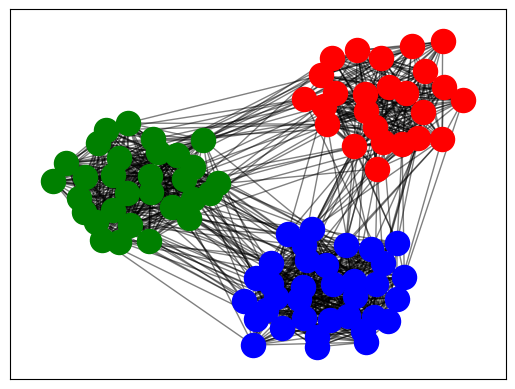

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig
import numpy as np

# Créer un SBM avec NetworkX
def create_sbm():
    sizes = [25, 30, 35]  # Taille des blocs
    probs = [[0.8, 0.05, 0.05], [0.05, 0.8, 0.05], [0.05, 0.05, 0.8]]  # Probabilités de connexion intra et inter-blocs
    G = nx.stochastic_block_model(sizes, probs)
    return G

G = create_sbm()

# Visualisation
pos = nx.spring_layout(G)
colors = ['red', 'green', 'blue']
for count, block in enumerate(range(3)):
    nodes = [n for n in G.nodes if G.nodes[n]['block'] == block]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors[count])

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

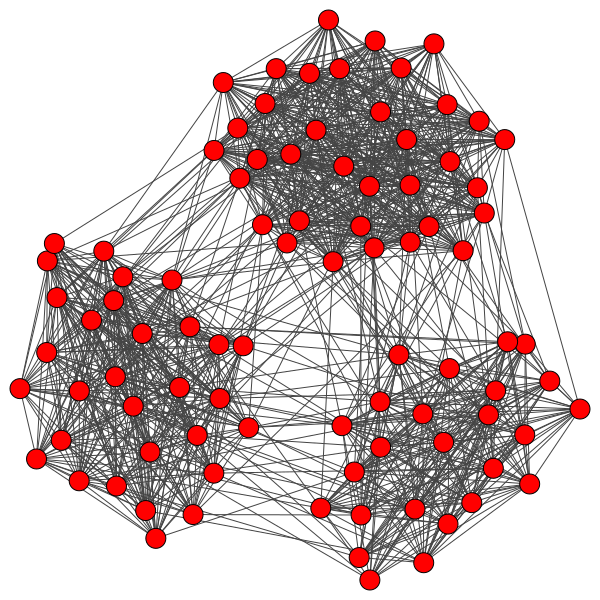

In [2]:
from igraph import Graph, plot

sizes = [25, 30, 35]  # Taille des blocs
probs = [[0.8, 0.05, 0.05], [0.05, 0.8, 0.05], [0.05, 0.05, 0.8]]  # Probabilités de connexion intra et inter-blocs

# Générer le graphe SBM
g = Graph.SBM(90, probs, sizes)
plot(g)

## Zachary's karate club directed graph

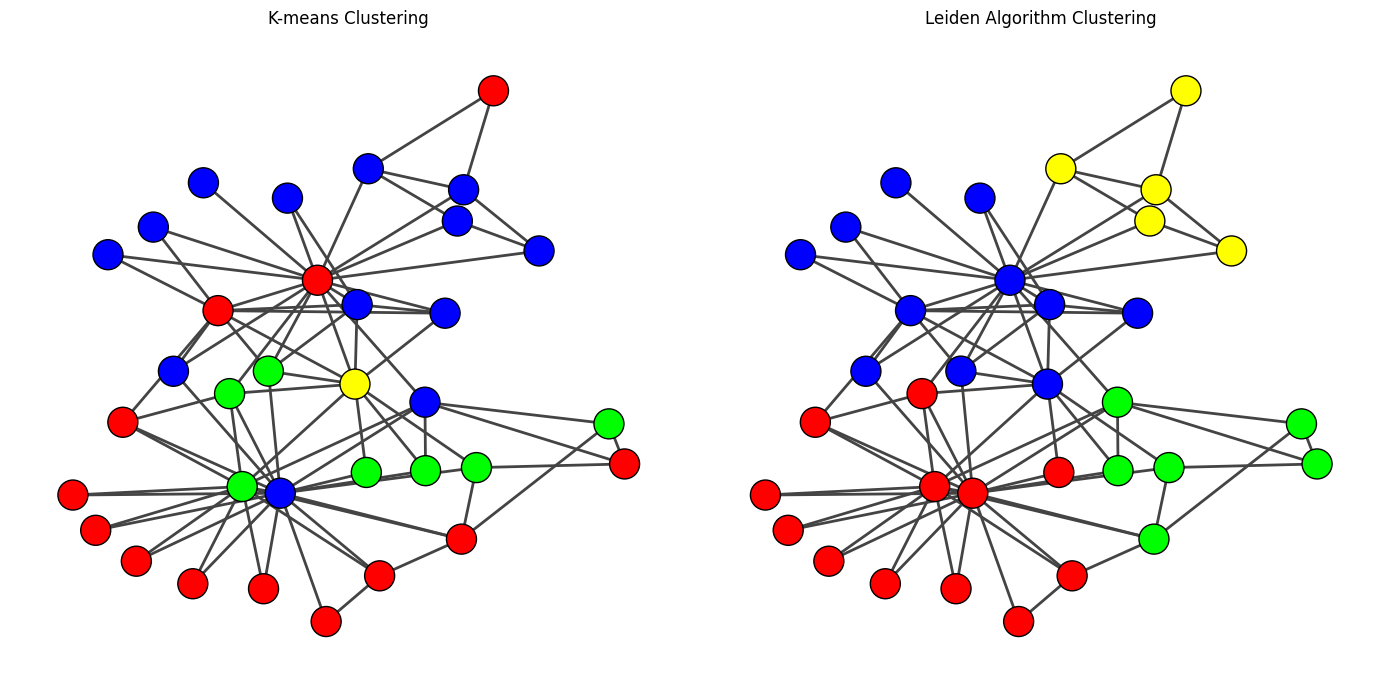

In [3]:
import igraph as ig
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import leidenalg

# Charger le graphe de Zachary's Karate Club
g = ig.Graph.Famous("Zachary")

# Obtenir la matrice d'adjacence
A = np.array(g.get_adjacency().data)

# Calculer les vecteurs propres pour l'incorporation spectrale
eigenvalues, eigenvectors = np.linalg.eigh(A)

# Ignorer la première valeur propre et le vecteur propre correspondant (ils sont nuls)
X = eigenvectors[:, 1:3]  # Choisissez les deux premiers vecteurs propres significatifs

# Appliquer K-means sur l'incorporation spectrale avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels_kmeans = kmeans.labels_

# Définir les couleurs pour chaque cluster
colors = ['red', 'blue', 'green', 'yellow']
node_colors_kmeans = [colors[label] for label in labels_kmeans]
g.vs["color"] = node_colors_kmeans

# Appliquer l'algorithme de Leiden pour la partition de modularité
partition = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)
node_colors_leiden = [colors[part] for part in partition.membership]
g.vs["color"] = node_colors_leiden

# Créer une figure matplotlib avec 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot pour K-means
axes[0].set_title("K-means Clustering")
ig.plot(g, vertex_color=node_colors_kmeans, layout=g.layout('kk'), target=axes[0], mark_groups=False)

# Plot pour Leiden
axes[1].set_title("Leiden Algorithm Clustering")
ig.plot(g, vertex_color=node_colors_leiden, layout=g.layout('kk'), target=axes[1], mark_groups=False)

plt.tight_layout()
plt.show()


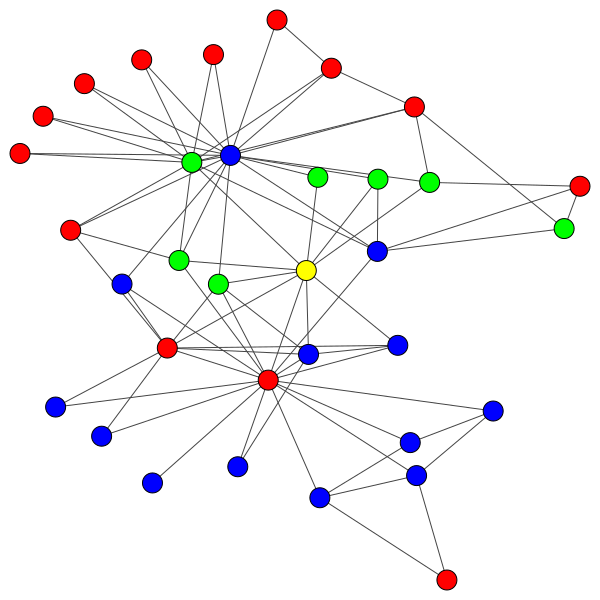

In [ ]:
from igraph import Graph, plot
from sklearn.cluster import KMeans


# Charger le graphe de Zachary's Karate Club
g = ig.Graph.Famous("Zachary")

# Obtenir la matrice d'adjacence
A = np.array(g.get_adjacency().data)

# Calculer les vecteurs propres pour l'incorporation spectrale
eigenvalues, eigenvectors = np.linalg.eigh(A)

# Ignorer la première valeur propre et le vecteur propre correspondant (ils sont nuls)
X = eigenvectors[:, 1:3]  # Choisissez les deux premiers vecteurs propres significatifs

# Appliquer K-means sur l'incorporation spectrale avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = kmeans.labels_

# Visualiser le graphe avec les labels de cluster
colors = ['red', 'blue', 'green', 'yellow']
node_colors = [colors[label] for label in labels]
g.vs["color"] = node_colors
layout = g.layout('kk')  # Kamada-Kawai layout pour une meilleure visualisation

# Plot avec titre
ig.plot(g, vertex_color=g.vs["color"], layout=layout, title="K-means Clustering on Zachary's Karate Club")

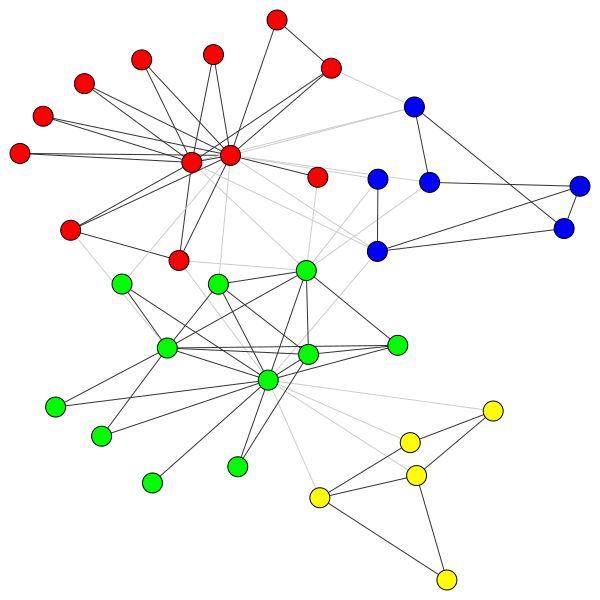

In [ ]:
import leidenalg

partition = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)
plot(partition)
